In [1]:
import pandas as pd
import numpy as npt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("international-visitors-london-raw.csv", encoding="latin1")

In [3]:
df.shape

(61462, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           61462 non-null  object 
 1   quarter        61462 non-null  object 
 2   market         61462 non-null  object 
 3   dur_stay       61462 non-null  object 
 4   mode           61462 non-null  object 
 5   purpose        61462 non-null  object 
 6   area           61462 non-null  object 
 7   Visits (000s)  61462 non-null  float64
 8   Spend (£m)     61462 non-null  float64
 9   Nights (000s)  61462 non-null  float64
 10  sample         61462 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 5.2+ MB


In [5]:
df.rename(columns={"Visits (000s)": "visits"}, inplace=True)

In [6]:
df.head()

,year,quarter,market,dur_stay,mode,purpose,area,visits,Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1


# Market segmentation

### Identify the top 10 origin markets by total visits across all years.

In [7]:
top10_markets = (
    df.groupby(["market"])["visits"].sum()
    .astype("int").reset_index()
    .sort_values(by="visits",ascending=False).head(10)
)

In [8]:
top10_markets

,market,visits
60,USA,42078
14,France,28980
15,Germany,22785
24,Italy,19207
54,Spain,17716
22,Irish Republic,12900
31,Netherlands,12213
1,Australia,10320
55,Sweden,7656
7,Canada,7639


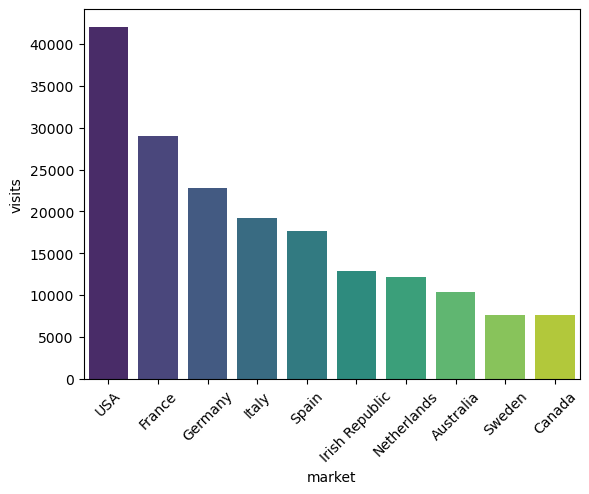

In [9]:
sns.barplot(
    data=top10_markets,
    x='market',
    y='visits',
    palette='viridis'
)
plt.xticks(rotation=45)
plt.show()

#### Plot yearly visit trends for these markets in a chart and determine how many exceeded one million visits in at least one year.

In [10]:
# Filter dataset to those markets and aggregate yearly visits
top10_market_list = top10_markets["market"].tolist()
year_visit_trends = df[df['market'].isin(top10_market_list)].groupby(["year", "market"])["visits"].sum().astype(int).reset_index()

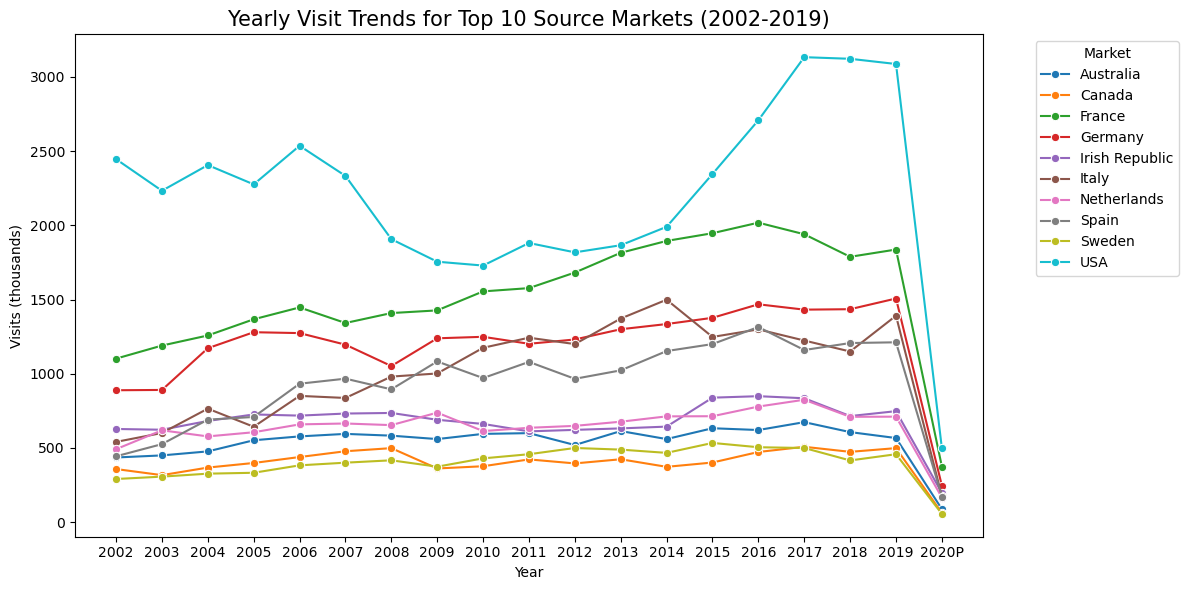

In [11]:
# Plot yearly visit trends
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(
    data=year_visit_trends,
    x="year",
    y="visits",
    hue="market",
    marker="o"
)

ax.set_title("Yearly Visit Trends for Top 10 Source Markets (2002-2019)", fontsize=15)
ax.set_xlabel('Year')
ax.set_ylabel('Visits (thousands)')
plt.legend(title="Market", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [12]:
# Determine which markets exceeded one million visits in any year
threshold = 1000
markets_over_1m = (
    year_visit_trends[year_visit_trends['visits'] > threshold]['market']
    .unique()
    .tolist()
)
print("Markets that exceeded one million visits in at least one year:")

for m in markets_over_1m:
    print(f" - {m}")

Markets that exceeded one million visits in at least one year:
 - France
 - USA
 - Germany
 - Italy
 - Spain


In [14]:
# Calculate the compound annual growth rate (CAGR) of visits for each top market and find the fastest-growing one.
pivot_visits = (
    year_visit_trends.pivot(
    index='year',
    columns='market',
    values='visits'
)
)

In [15]:
pivot_visits

market,Australia,Canada,France,Germany,Irish Republic,Italy,Netherlands,Spain,Sweden,USA
year,,,,,,,,,,
2002,436,358,1102,889,628,541,492,444,291,2446
2003,450,317,1190,891,623,601,619,526,307,2233
2004,477,368,1258,1172,682,765,578,691,327,2406
2005,552,399,1367,1280,726,643,606,709,333,2276
2006,578,439,1447,1274,718,851,659,933,383,2536
2007,595,478,1342,1196,732,837,665,967,401,2333
2008,583,499,1409,1052,736,981,654,895,417,1907
2009,560,362,1427,1239,690,1002,738,1083,374,1755
2010,595,377,1555,1249,662,1175,614,971,430,1729


In [16]:
pivot_visits.drop(index='2020P', inplace=True)

In [17]:
pivot_visits

market,Australia,Canada,France,Germany,Irish Republic,Italy,Netherlands,Spain,Sweden,USA
year,,,,,,,,,,
2002,436,358,1102,889,628,541,492,444,291,2446
2003,450,317,1190,891,623,601,619,526,307,2233
2004,477,368,1258,1172,682,765,578,691,327,2406
2005,552,399,1367,1280,726,643,606,709,333,2276
2006,578,439,1447,1274,718,851,659,933,383,2536
2007,595,478,1342,1196,732,837,665,967,401,2333
2008,583,499,1409,1052,736,981,654,895,417,1907
2009,560,362,1427,1239,690,1002,738,1083,374,1755
2010,595,377,1555,1249,662,1175,614,971,430,1729


In [18]:
start_year = pivot_visits.index.min()
start_year

'2002'

In [19]:
end_year = pivot_visits.index.max()
end_year

'2019'

In [20]:
year_span = int(end_year) - int(start_year)
year_span

17

In [21]:
start_visits = pivot_visits.loc[start_year]
start_visits

market
Australia          436
Canada             358
France            1102
Germany            889
Irish Republic     628
Italy              541
Netherlands        492
Spain              444
Sweden             291
USA               2446
Name: 2002, dtype: int32

In [22]:
end_visits = pivot_visits.loc[end_year]
end_visits

market
Australia          567
Canada             499
France            1837
Germany           1507
Irish Republic     748
Italy             1391
Netherlands        711
Spain             1212
Sweden             458
USA               3087
Name: 2019, dtype: int32

In [23]:
cagr = ((end_visits / start_visits) ** (1 / year_span) - 1 ) * 100
cagr

market
Australia         1.557397
Canada            1.972574
France            3.051558
Germany           3.153277
Irish Republic    1.033913
Italy             5.712243
Netherlands       2.189470
Spain             6.085028
Sweden            2.703825
USA               1.378507
dtype: float64

In [24]:
cagr_df = cagr.reset_index(name="CAGR (%)")

In [25]:
cagr_df["CAGR (%)"] = cagr_df["CAGR (%)"].round(2)

In [26]:
cagr_df

,market,CAGR (%)
0,Australia,1.56
1,Canada,1.97
2,France,3.05
3,Germany,3.15
4,Irish Republic,1.03
5,Italy,5.71
6,Netherlands,2.19
7,Spain,6.09
8,Sweden,2.70
9,USA,1.38


In [29]:
cagr_df_sorted = cagr_df.sort_values("CAGR (%)", ascending=False)

In [30]:
cagr_df_sorted

,market,CAGR (%)
7,Spain,6.09
5,Italy,5.71
3,Germany,3.15
2,France,3.05
8,Sweden,2.70
6,Netherlands,2.19
1,Canada,1.97
0,Australia,1.56
9,USA,1.38
4,Irish Republic,1.03


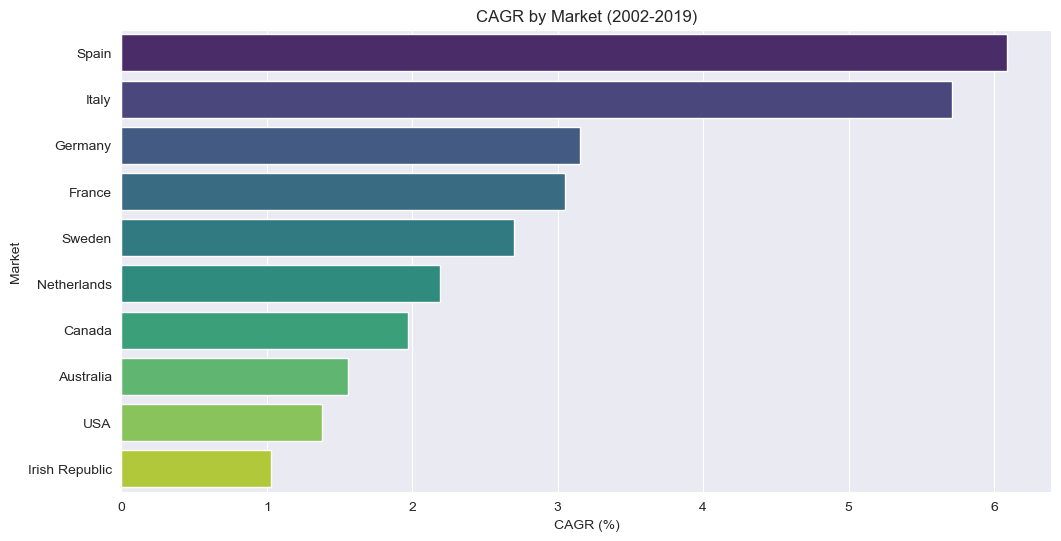

In [57]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')


sns.barplot(data=cagr_df_sorted,
           x="CAGR (%)", y="market", palette='viridis')
plt.title("CAGR by Market (2002-2019)")
plt.ylabel("Market")
plt.show()

### Key Insights from the Plots:

    - Spain and Italy had the highest CAGR (~5.5-6%).
    
    - France and Germany grew steadily (~3% CAGR).
    
    - Ireland and the USA had the lowest growth (~1% CAGR).

    - Netherlands (2.16%), Sweden (2.68%), Canada (1.93%)

    - Spain and Italy had the fastest-growing markets over the 17-year period, while Ireland and the USA had the slowest growth.

In [38]:
pivot_visits

market,Australia,Canada,France,Germany,Irish Republic,Italy,Netherlands,Spain,Sweden,USA
year,,,,,,,,,,
2002,436,358,1102,889,628,541,492,444,291,2446
2003,450,317,1190,891,623,601,619,526,307,2233
2004,477,368,1258,1172,682,765,578,691,327,2406
2005,552,399,1367,1280,726,643,606,709,333,2276
2006,578,439,1447,1274,718,851,659,933,383,2536
2007,595,478,1342,1196,732,837,665,967,401,2333
2008,583,499,1409,1052,736,981,654,895,417,1907
2009,560,362,1427,1239,690,1002,738,1083,374,1755
2010,595,377,1555,1249,662,1175,614,971,430,1729


In [43]:
start_year_df = pivot_visits.loc[start_year].reset_index(name='2002')

In [45]:
end_year_df = pivot_visits.loc[end_year].reset_index(name='2019')

In [47]:
merged_2002_2019 = start_year_df.merge(end_year_df)

In [48]:
merged_2002_2019

,market,2002,2019
0,Australia,436,567
1,Canada,358,499
2,France,1102,1837
3,Germany,889,1507
4,Irish Republic,628,748
5,Italy,541,1391
6,Netherlands,492,711
7,Spain,444,1212
8,Sweden,291,458
9,USA,2446,3087


In [49]:
merged_2002_2019['CAGR (%)'] = (
    ((merged_2002_2019['2019'] / merged_2002_2019['2002']) ** (1/year_span) - 1) * 100
).round(2)

In [52]:
merged_2002_2019 = merged_2002_2019.sort_values('CAGR (%)', ascending=False)

In [53]:
merged_2002_2019

,market,2002,2019,CAGR (%)
7,Spain,444,1212,6.09
5,Italy,541,1391,5.71
3,Germany,889,1507,3.15
2,France,1102,1837,3.05
8,Sweden,291,458,2.70
6,Netherlands,492,711,2.19
1,Canada,358,499,1.97
0,Australia,436,567,1.56
9,USA,2446,3087,1.38
4,Irish Republic,628,748,1.03


In [55]:
melted_df = merged_2002_2019.melt(
    id_vars='market',
    value_vars=['2002', '2019'],
    var_name='Year',
    value_name='Value'
)

In [56]:
melted_df

,market,Year,Value
0,Spain,2002,444
1,Italy,2002,541
2,Germany,2002,889
3,France,2002,1102
4,Sweden,2002,291
5,Netherlands,2002,492
6,Canada,2002,358
7,Australia,2002,436
8,USA,2002,2446
9,Irish Republic,2002,628


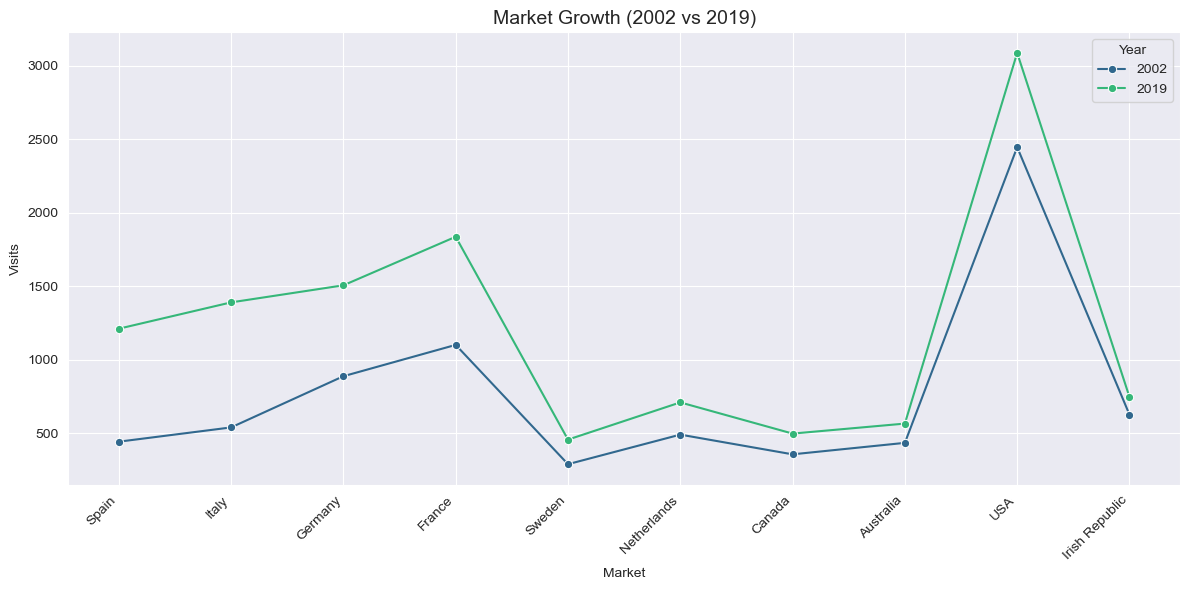

In [68]:
# Line Plot for 2002 vs 2019 Comparison
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=melted_df,
    x='market',
    y='Value',
    hue='Year',
    marker='o',
    palette='viridis'
)
plt.title('Market Growth (2002 vs 2019)', fontsize=14)
plt.xlabel('Market')
plt.ylabel('Visits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()